In [29]:
import pandas as pd
import numpy as np
import warnings

### Importing and Exploring the Dataset

In [30]:
df  = pd.read_csv('chapter_3/banksim.csv')

In [31]:
df.drop('Unnamed: 0' ,axis =1, inplace = True)

In [32]:
df.shape

(7200, 5)

In [33]:
df.head()

,age,gender,category,amount,fraud
0,3,F,es_transportation,49.71,0
1,4,F,es_health,39.29,0
2,3,F,es_transportation,18.76,0
3,4,M,es_transportation,13.95,0
4,2,M,es_transportation,49.87,0


### Groupby categories and take the mean


In [34]:
df.groupby('category').mean()

,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


### from the above result we can see that majority of Frauds Occured in Travel, Lisure, Sports

In [35]:
df[df['category'] == 'es_travel'].head()

,age,gender,category,amount,fraud
6042,3,F,es_travel,236.1474,0
7001,3,M,es_travel,236.1474,1
7010,2,F,es_travel,158.2300,1
7020,2,M,es_travel,236.1474,1
7024,4,M,es_travel,236.1474,1


### Customer segmentation on the bais of Age

In [36]:
df.groupby('age').mean()

,amount,fraud
age,,
0,49.468935,0.050000
1,35.622829,0.026648
2,37.228665,0.028718
3,37.279338,0.023283
4,36.197985,0.035966
5,37.547521,0.023990
6,36.700852,0.022293
U,39.117000,0.000000


In [37]:
df.age.value_counts()

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64

 ### investigate the average amounts spend in normal transactions versus fraud transactions

In [38]:
import matplotlib.pyplot as plt

In [39]:
df_fraud = df[df.fraud==1]
df_non_fraud =df[df.fraud==0]

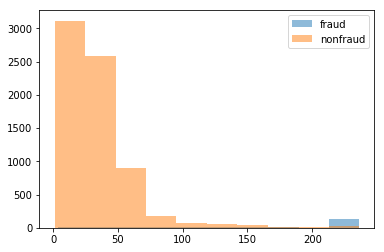

In [40]:
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

### Pre-processing and Scaling the data

In [41]:
df.columns


Index(['age', 'gender', 'category', 'amount', 'fraud'], dtype='object')

In [42]:
dummy = pd.get_dummies(df.category)

In [43]:
df.drop('category' , axis  = 1,  inplace =True)

In [44]:
df = pd.concat([df,dummy] , axis  = 1)

In [45]:
df.columns

Index(['age', 'gender', 'amount', 'fraud', 'es_barsandrestaurants',
       'es_contents', 'es_fashion', 'es_food', 'es_health', 'es_home',
       'es_hotelservices', 'es_hyper', 'es_leisure', 'es_otherservices',
       'es_sportsandtoys', 'es_tech', 'es_transportation', 'es_travel',
       'es_wellnessandbeauty'],
      dtype='object')

In [46]:
len(df.columns)

19

In [47]:
df.head()

,age,gender,amount,fraud,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
0,3,F,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4,F,39.29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,F,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,M,13.95,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,M,49.87,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
def binary_map(x):
    return x.map({'F': 0 , 'M':1})
df['gender']=df[['gender']].apply(binary_map)

In [49]:
df.head()

,age,gender,amount,fraud,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
0,3,0.0,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4,0.0,39.29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,0.0,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1.0,13.95,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,1.0,49.87,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
df.dropna(inplace =True)
df.drop('es_wellnessandbeauty', axis  =1 , inplace =True)

In [51]:
label=df.fraud
df.drop('fraud' ,axis = 1 , inplace = True)

### Changing the Df into Numpy array of type Float and Scaling

In [53]:
X = np.array(df).astype(np.float)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Building the BaseLine Model for Clustering using KMEANS

In [56]:
from sklearn.cluster import MiniBatchKMeans

In [57]:
kmean_model = MiniBatchKMeans(n_clusters = 8 ,  random_state =0)

In [58]:
kmean_model.fit(X_scaled)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

# Elbow method

### Let's apply the Elbow method and see what the optimal number of clusters 

In [59]:
clustno = range(1,10)

In [60]:
kmeans_array = [ MiniBatchKMeans(n_clusters = i ) for i in clustno]
score_array = [ kmeans_array[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_array))  ]

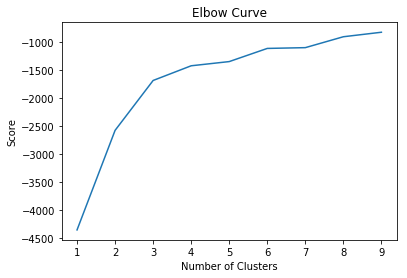

In [61]:
plt.plot(clustno, score_array)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### ​As we can see that the optimal number of clusters should probably be at around 3 clusters​

In [62]:
kmeans = MiniBatchKMeans(n_clusters=3 , random_state=0)
kmeans.fit(X_scaled)
X_Clusters=kmeans.predict(X_scaled)
X_cluster_centre = kmeans.cluster_centers_

In [63]:
np.unique(X_Clusters, return_counts =  True)


(array([0, 1, 2], dtype=int32), array([1221, 3249, 2714]))

## Model Validation

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, label, test_size=0.3, random_state=0)

In [66]:
kmeans_1 = MiniBatchKMeans(n_clusters = 3, random_state = 42 ).fit(X_train)

In [67]:
X_train_clusters = kmeans_1.predict(X_train)

In [68]:
X_train_Centers = kmeans_1.cluster_centers_

### Obtain predictions and calculate distance from cluster centroid

In [69]:
dist = [np.linalg.norm(x-y) for x,y in zip(X_train,X_train_Centers[X_train_clusters])]

###  Create fraud predictions based on outliers on clusters 

In [75]:
km_y_pred = np.array(dist)

In [76]:
km_y_pred[dist >= np.percentile(dist,95)] = 1
km_y_pred[dist <  np.percentile(dist,95)] = 0

### let's Check the Score

In [77]:
from sklearn.metrics import confusion_matrix,roc_auc_score

In [78]:
confusion_matrix(y_train,km_y_pred)

array([[4734,  157],
       [  42,   95]])

In [79]:
roc_auc_score(y_train,km_y_pred)

0.8306654409185947

## Fraud Analysis Using DBSCAN

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
db  = DBSCAN(eps = 0.9, min_samples = 10 , n_jobs = -1).fit(X_scaled)
predicted_labels = db.labels_

In [82]:
np.unique(predicted_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21])

In [83]:
n_clusters = len(set(predicted_labels))- (1 if -1 in predicted_labels else 0)

### Performance Metrics

In [84]:
from sklearn.metrics import homogeneity_score,silhouette_score

print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(label, predicted_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, predicted_labels))

Estimated number of clusters: 22
Homogeneity: 0.612
Silhouette Coefficient: 0.713


### Assessing smallest clusters

In [85]:
counts = np.bincount(predicted_labels[predicted_labels>=0])

In [86]:
counts

array([3249,  144, 2714,   55,  173,  119,  122,   98,   54,   15,   76,
         15,   43,   25,   51,   47,   42,   15,   25,   20,   19,   10])

In [87]:
index_smallest_clusters = np.argsort(counts)[:3]
index_smallest_clusters

array([21, 17,  9])

In [88]:
print('count of smallest 3 clusters is',counts[index_smallest_clusters] )

count of smallest 3 clusters is [10 15 15]


## Checking and Validating Results

In [89]:
df = pd.DataFrame({'clusterNumber_predicted': predicted_labels , 'actual_values_fraud' : label})

In [90]:
df.head()

,actual_values_fraud,clusterNumber_predicted
0,0,0
1,0,1
2,0,0
3,0,2
4,0,2


In [91]:
df['predicted_fraud'] = np.where((df['clusterNumber_predicted']==21)|(df['clusterNumber_predicted']==17)|(df['clusterNumber_predicted']==9) ,1,0)

In [92]:
df.head()

,actual_values_fraud,clusterNumber_predicted,predicted_fraud
0,0,0,0
1,0,1,0
2,0,0,0
3,0,2,0
4,0,2,0


In [93]:
print(pd.crosstab(df['actual_values_fraud'], df['predicted_fraud'], rownames = ['actual Values'] , colnames= ['predicted_values']))

predicted_values     0   1
actual Values             
0                 6968  16
1                  176  24


### Conclusion
Of all flagged cases, roughly 2/3 are actually fraud! Since you only take the three smallest clusters, by definition you flag less cases of fraud, so you catch less but also have less false positives. However, you are missing quite a lot of fraud cases. Increasing the amount of smallest clusters you flag could improve that, at the cost of more false positives of course. 

In [94]:
roc_auc_score(df['actual_values_fraud'],df['predicted_fraud'])

0.5588545246277206